# Milestone 1: Exploratory Data Analysis

**Authors**: __Khizer Zakir & Rodrigo Brust Santos__

__October 2023__

## 2. Visual Exploration


### Description 

In this section, our focus is on exploring various visualizations applied to the general dataset, as well as specifically to the training and testing sets. These visualizations include correlation matrices, scatter plots, and univariate plots, both in their original form and after applying log transformations. The objective is to gain a comprehensive understanding of the relationships and distributions within the explanatory variables. These visualizations serve as a foundational step in the decision-making process for subsequent preprocessing steps.

The correlation matrix provides insights into the interdependencies among variables, highlighting potential patterns and relationships. Scatter plots offer a visual representation of how individual variables relate to one another, especially concerning the target variable. Univariate plots, on the other hand, focus on the distribution of individual variables, shedding light on their statistical characteristics.

By examining both the original and log-transformed versions of the plots, we aim to discern any patterns or trends that may not be immediately apparent. This visual exploration sets the stage for a deeper dive into the statistical properties of the dataset. Concepts and details derived from this visualization section will play a pivotal role in guiding subsequent preprocessing steps, ensuring that our data preparation aligns with the inherent characteristics and nuances revealed through visual inspection.

In [25]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from tabulate import tabulate
import warnings

warnings.filterwarnings('ignore')

In [26]:
# original dataset to see the distribution of the data 

file_path = '../../pontos_limpo.csv'
df = pd.read_csv(file_path, sep='\t')
df.head()


Estação N__Lab_  Long__X_  Lat__Y_       Folha  Ag (ppm)  Al (%)  As (ppm)  \
0  AC-0002  CDE225    248757  7972050  Coromandel      0.03    2.63       4.0   
1  AC-0003  CDE226    244460  7973135  Coromandel      0.02    1.93       2.0   
2  AC-0004  CDE227    244044  7970217  Coromandel      0.04    1.47       3.0   
3  AC-0005  CDE228    242895  7970593  Coromandel      0.05    1.72      23.0   
4  AC-0006  CDE229    242999  7971416  Coromandel      0.04    0.97       7.0   

   Au (ppm)  B (ppm)  ...  Ta (ppm)  Te (ppm)  Th (ppm)  Ti (%)  U (ppm)  \
0      0.05        5  ...      25.0      0.06       7.4    0.03     0.70   
1      0.05        5  ...      25.0      0.14       8.2    0.06     0.94   
2      0.05        5  ...      25.0      0.08       5.4    0.04     0.65   
3      0.05        5  ...      25.0     25.00       6.9    0.04     1.01   
4      0.05        5  ...      25.0     25.00       5.7    0.05     0.82   

   V (ppm)  W (ppm)  Y (ppm)  Zn (ppm)  Zr (ppm)  
0       73      0.3    13.15        27       6.3  
1       58      0.3    23.90        58       6.9  
2       55      0.2    10.40        34       1.8  
3       66      0.7     9.34        27       4.1  
4       41      0.4     7.45        28       1.5  

[5 rows x 56 columns]

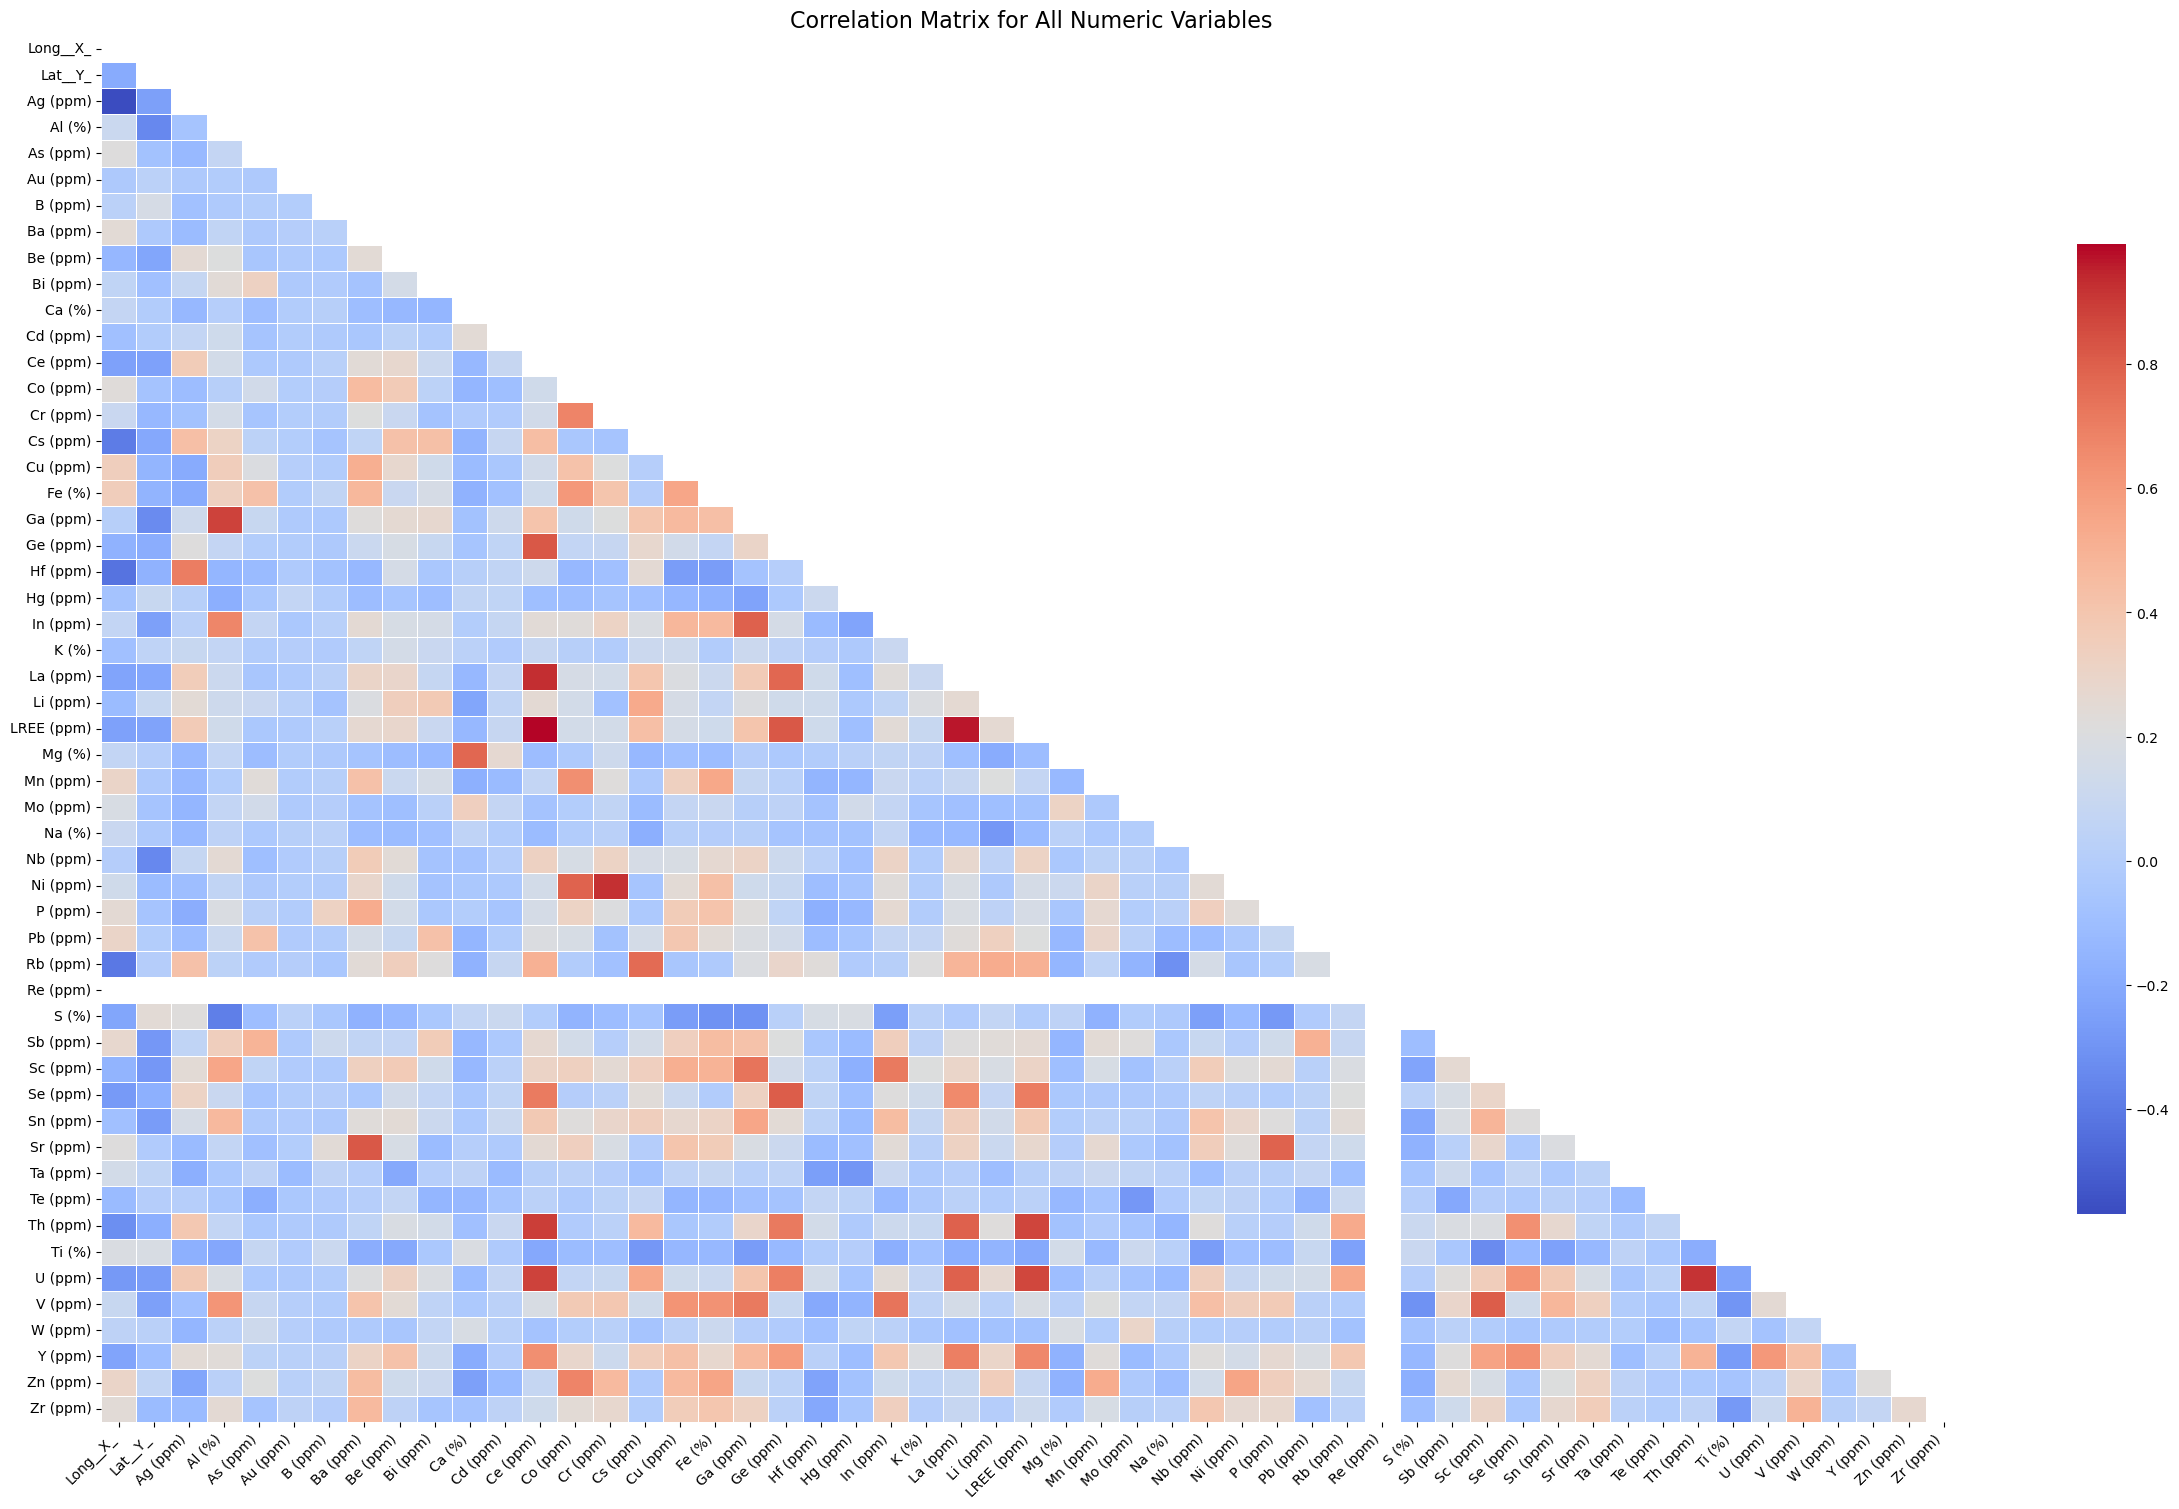

In [27]:
# only numeric columns to visualize the distribution of the data

plt.figure(figsize=(30, 18))
corr_mat = df.select_dtypes(include='number').corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
sns.heatmap(corr_mat, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.7}, mask=mask)
plt.title("Correlation Matrix for All Numeric Variables", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)

plt.show()



### Figure 1: Correlation Matrix Explanation

This figure is extremely essential in understanding the relationship between all the variables. Mostly, it is assumed that all the variables, especially the explanantory variables preferably be independent to help train the model to perform well against an unseen data. Although there are some red patches in between, the data looks really good to explain the target variable 'Zn'. In our used case, some of the stronger correlations are inevitable given the chemical associations of a few elements in their respective outcrops. This plot along with the following plots help use identify the main variables and the variables that we need to drop. 

High correlation among features may indicate multicollinearity, which can affect the stability and interpretability of the model. According to Sunil Kumar and Ilyoung Chong, In the context of machine learning, it's often desirable to have features that are moderately correlated with the target but not highly correlated with each other. In our case, there are a few variables that are strongly correlated with one another that will be dealt with in the other section of this project. 

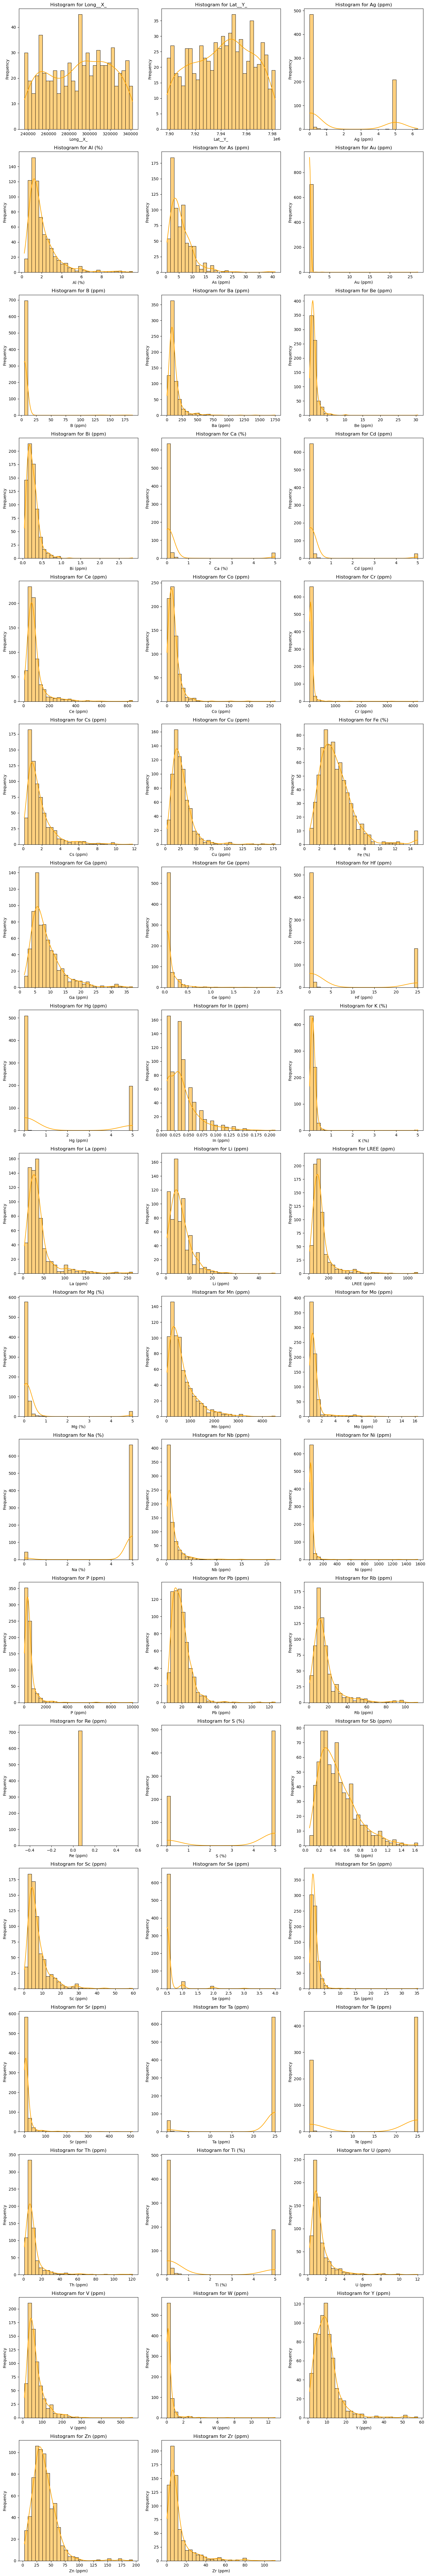

In [9]:
# -- Histograms for all numeric features -- #
### Helps understand the distribution of the data and identify outliers ###

numeric_feature_names = df.select_dtypes(include=np.number).columns.tolist()
numeric_features = df[numeric_feature_names]

# Calculate the number of subplots needed
num_rows = len(numeric_feature_names) // 3 + (len(numeric_feature_names) % 3 > 0)
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Loop through numeric features
for i, feature_name in enumerate(numeric_feature_names):
    sns.histplot(numeric_features[feature_name], kde=True, ax=axs[i], color='orange', bins=30)
    axs[i].set_title(f'Histogram for {feature_name}')
    axs[i].set_xlabel(feature_name)
    axs[i].set_ylabel('Frequency')

# Remove empty subplots if there are any
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


### Figure 2: Histplot

These subplots demonstrate the distribution of each variable in the dataset. Most of the variables are right/positive-skewed as appear in the distribution. We will try log-transformation on the data to see if we can handle the skewness and impact of the outliers and high variance through that

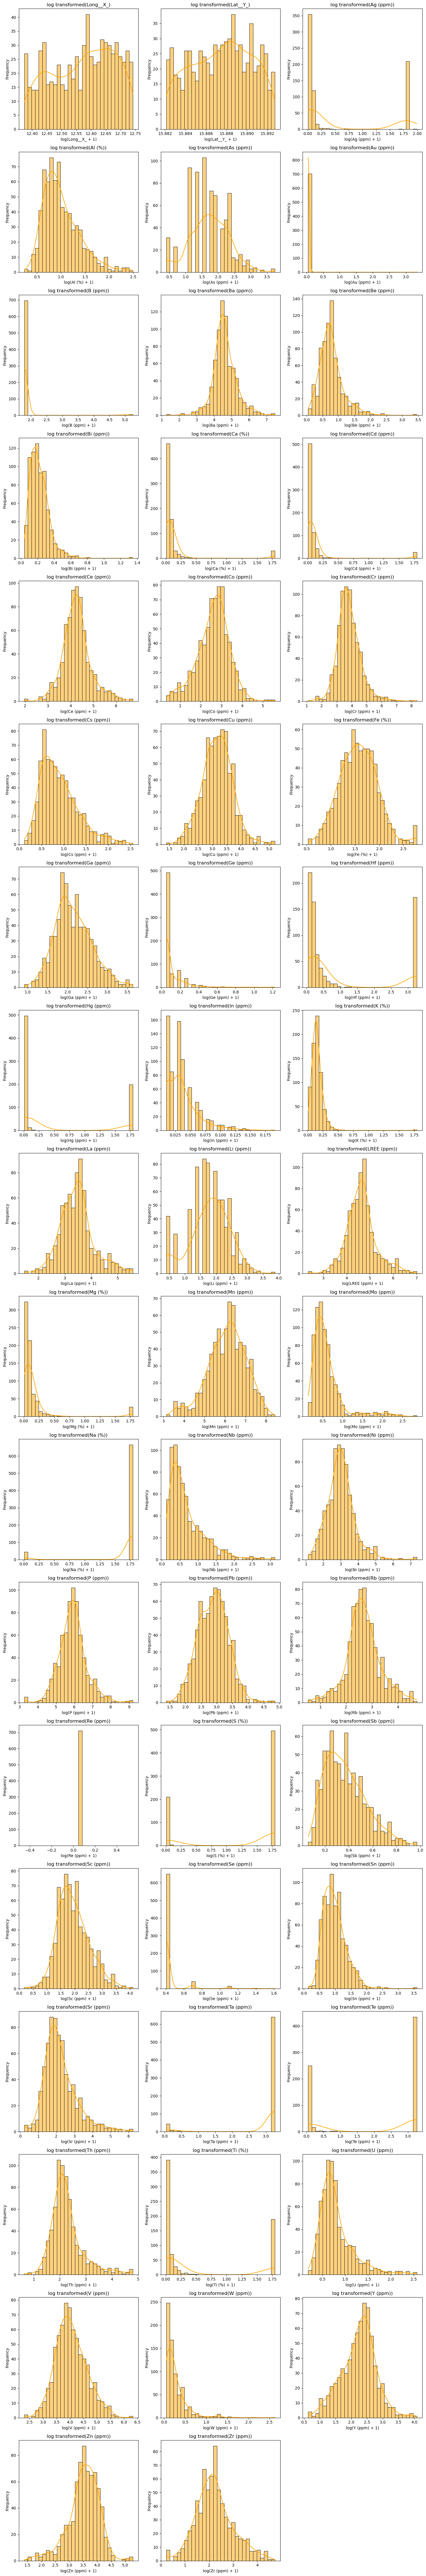

In [24]:
# -- log transformation
# Calculate the number of subplots needed
num_rows = len(numeric_feature_names) // 3 + (len(numeric_feature_names) % 3 > 0)
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

axs = axs.flatten()

# Loop through numeric features
for i, feature_name in enumerate(numeric_feature_names):
    # Apply log transformation (log1p handles zero values)
    transformed_feature = np.log1p(numeric_features[feature_name])
    
    sns.histplot(transformed_feature, kde=True, ax=axs[i], color='orange', bins=30)
    axs[i].set_title(f'log transformed({feature_name})')
    axs[i].set_xlabel(f'log({feature_name}')
    axs[i].set_ylabel('Frequency')

# Remove empty subplots if there are any
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


### Figure 3: Log Transformation plot

This plot really helped to understand the distribution of the data values and handle the effect of outliers, high variance and the skewness of the data. This transformation is crucial as it aids the selection of important variables for the later stages.

In [18]:
df_train = pd.read_csv('../training.csv')
df_test = pd.read_csv('../testing.csv')
# Assuming df_train and df_test are your DataFrames
print("DataFrame - df_train:")
print(tabulate(df_train.head(), headers='keys', tablefmt='pretty'))

print("\nDataFrame - df_test:")
print(tabulate(df_test.head(), headers='keys', tablefmt='pretty'))


DataFrame - df_train:
+---+----------+-----------+----------+--------+----------+----------+----------+----------+--------+----------+----------+----------+----------+----------+----------+--------+----------+----------+----------+----------+-------+----------+----------+------------+--------+----------+----------+----------+----------+---------+----------+----------+----------+----------+----------+----------+----------+--------+---------+---------+---------+---------+----------+----------+
|   |    x     |     y     | Ag (ppm) | Al (%) | As (ppm) | Ba (ppm) | Be (ppm) | Bi (ppm) | Ca (%) | Cd (ppm) | Ce (ppm) | Co (ppm) | Cr (ppm) | Cs (ppm) | Cu (ppm) | Fe (%) | Ga (ppm) | Hf (ppm) | Hg (ppm) | In (ppm) | K (%) | La (ppm) | Li (ppm) | LREE (ppm) | Mg (%) | Mn (ppm) | Mo (ppm) | Nb (ppm) | Ni (ppm) | P (ppm) | Pb (ppm) | Rb (ppm) | Sb (ppm) | Sc (ppm) | Sn (ppm) | Sr (ppm) | Th (ppm) | Ti (%) | U (ppm) | V (ppm) | W (ppm) | Y (ppm) | Zr (ppm) | Zn (ppm) |
+---+----------+-----------+


### 2.1 Visualizing the Dataset
Provide a few figures to help understand the dataset.


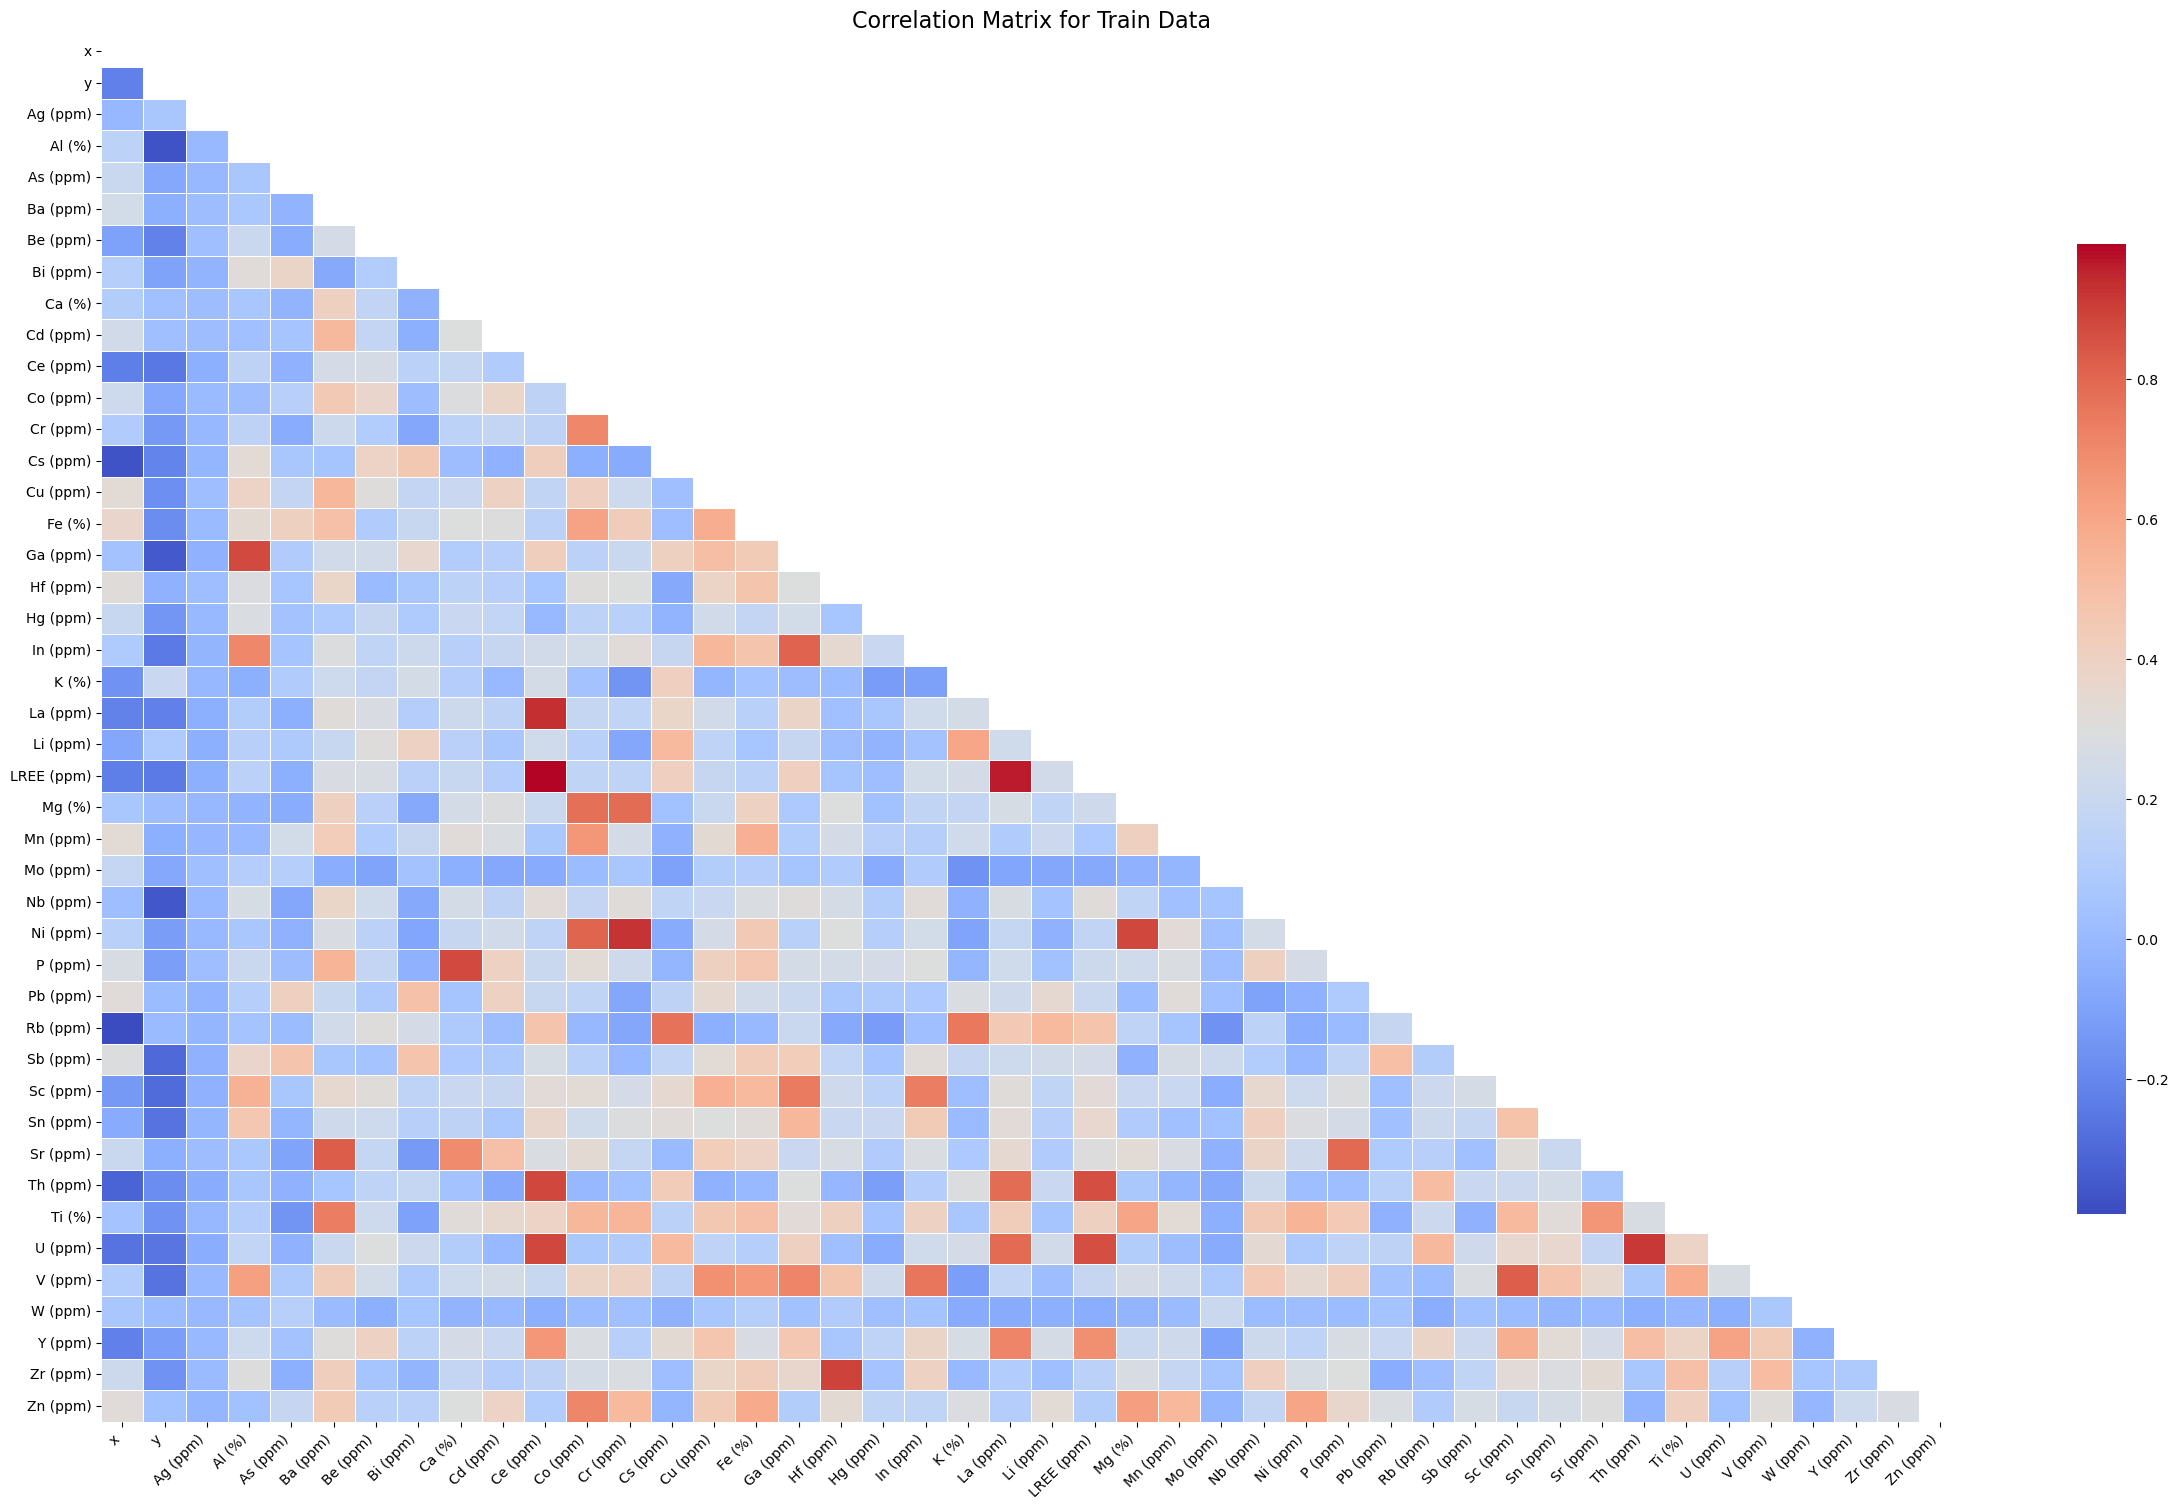

In [12]:
#-- visualizing the distribution of the training data


plt.figure(figsize=(30, 18))
corr_mat_train = df_train.corr()

#plot correlation matrix
# Create a mask to hide the upper triangle


# # Create a mask to hide the upper triangle
# mask = np.triu(np.ones_like(corr_mat_train, dtype=bool))
# sns.heatmap(corr_mat_train, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.7}, mask=mask)
# plt.title("Correlation Matrix for Train Data", fontsize=16)
# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.yticks(rotation=0, ha='right', fontsize=10)

# plt.show()


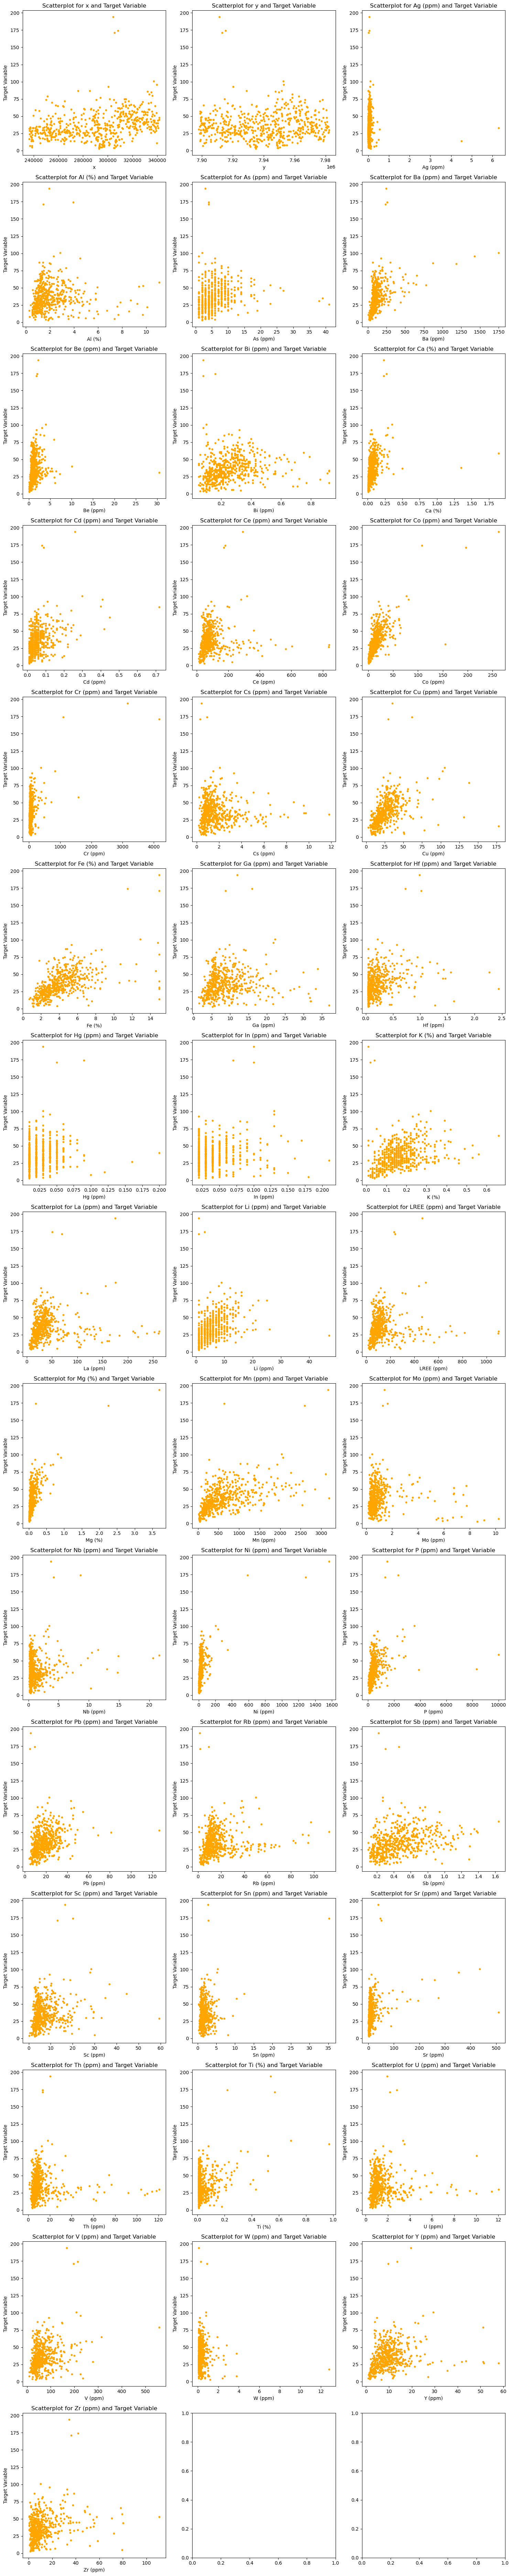

In [13]:
target_variable = df_train.columns[-1]
# Calculate the number of subplots needed
num_rows = len(numeric_feature_names) // 3 + (len(numeric_feature_names) % 3 > 0)
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Loop through feature names
for i in range(len(df_train.columns)-1):  # Exclude the last column (assuming it's the target variable)
    axs[i].scatter(df_train[df_train.columns[i]], df_train[target_variable], s=10, color='orange')
    axs[i].set_title(f'Scatterplot for {df_train.columns[i]} and Target Variable')
    axs[i].set_xlabel(df_train.columns[i])
    axs[i].set_ylabel('Target Variable')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


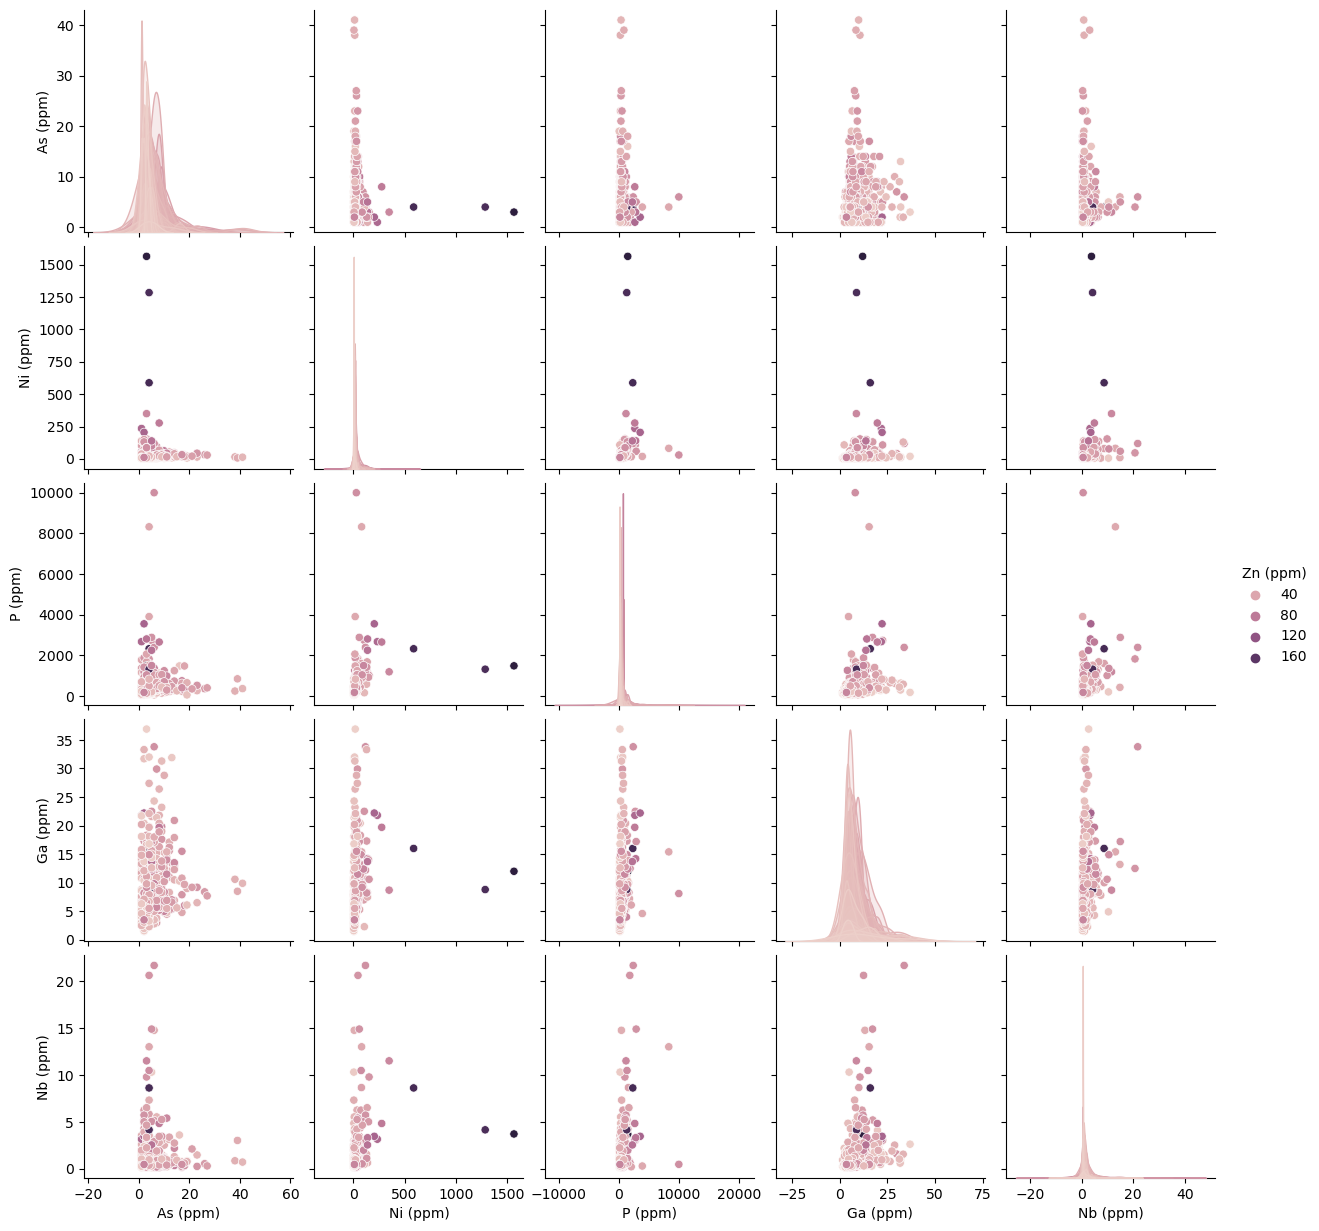

In [23]:
selected_variables = df_train.sample(5, axis=1)

# Concatenate the target variable with the selected variables for visualization
data_to_plot = pd.concat([df_train['Zn (ppm)'], selected_variables], axis=1)

# Create a pairplot
sns.pairplot(data_to_plot, diag_kind='kde', markers='o', hue='Zn (ppm)')

# Show the plot
plt.show()

<Axes: >

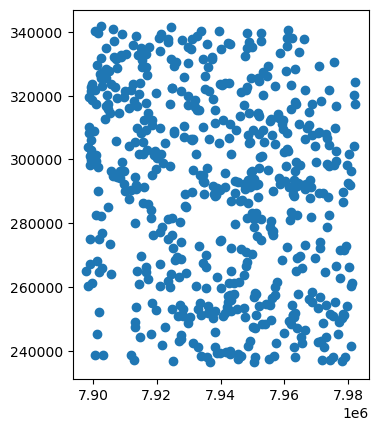

In [14]:
# Geographic visualization of the data

df_train.head()

gdf_train = gpd.GeoDataFrame(df_train, geometry=gpd.points_from_xy(df_train.y, df_train.x))

gdf_train.plot()

In [15]:
gdf_train.columns

Index(['x', 'y', 'Ag (ppm)', 'Al (%)', 'As (ppm)', 'Ba (ppm)', 'Be (ppm)',
       'Bi (ppm)', 'Ca (%)', 'Cd (ppm)', 'Ce (ppm)', 'Co (ppm)', 'Cr (ppm)',
       'Cs (ppm)', 'Cu (ppm)', 'Fe (%)', 'Ga (ppm)', 'Hf (ppm)', 'Hg (ppm)',
       'In (ppm)', 'K (%)', 'La (ppm)', 'Li (ppm)', 'LREE (ppm)', 'Mg (%)',
       'Mn (ppm)', 'Mo (ppm)', 'Nb (ppm)', 'Ni (ppm)', 'P (ppm)', 'Pb (ppm)',
       'Rb (ppm)', 'Sb (ppm)', 'Sc (ppm)', 'Sn (ppm)', 'Sr (ppm)', 'Th (ppm)',
       'Ti (%)', 'U (ppm)', 'V (ppm)', 'W (ppm)', 'Y (ppm)', 'Zr (ppm)',
       'Zn (ppm)', 'geometry'],
      dtype='object')

In [16]:
gdf_train.explore()